<a href="https://colab.research.google.com/github/kimjc95/computational-chemistry/blob/main/Ligand_Docking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Molecular DockingÏùÑ ColabÏóêÏÑú
2023-12-19 by Joo-Chan Kim at MSBL, KAIST

Ï§ÄÎπÑÎ¨º :

1. Î¶¨Í∞ÑÎìúÏùò MOL ÌååÏùº (Í≤∞Ìï©Ï∞®Ïàò, Ï†ÑÌïòÍ∞Ä Ï†úÎåÄÎ°ú ÏûÖÎ†•ÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï®)

2. Îã®Î∞±ÏßàÏùò PDB ÌååÏùº (heterogenÏù¥ ÏûàÍ±∞ÎÇò ÏùºÎ∂Ä ÏõêÏûêÍ∞Ä Îπ†Ï†∏ÏûàÏñ¥ÎèÑ ÏÉÅÍ¥Ä X)

3. Google Í≥ÑÏ†ï, Ïù∏ÌÑ∞ÎÑ∑ Ïó∞Í≤∞

In [ ]:
#@title Conda ÏÑ§Ïπò
#@markdown Îü∞ÌÉÄÏûÑÏù¥ Ï¢ÖÎ£åÎêòÏóàÎã§Í∞Ä Îã§Ïãú Ïó∞Í≤∞ÎêòÎäîÎç∞, ÎãπÌô©ÌïòÏßÄ ÎßàÏãúÍ≥† Ïù¥Ïñ¥ÏÑú Ïã§ÌñâÌïòÏãúÎ©¥ Îê©ÎãàÎã§.

# ColabÏóêÏÑú Conda Ïã§ÌñâÌïòÍ∏∞ ÏúÑÌï¥ Ï§ÄÎπÑ
!pip install -q condacolab
import condacolab
condacolab.install()
!rm -rf /usr/local/conda-meta/pinned

‚è¨ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
üì¶ Installing...
üìå Adjusting configuration...
ü©π Patching environment...
‚è≤ Done in 0:00:11
üîÅ Restarting kernel...


In [ ]:
#@title Dependencies ÏÑ§Ïπò
#@markdown (1Î∂Ñ Í∞ÄÎüâ ÏÜåÏöî)
#@markdown Ïù¥ÌãàÏóê Receptor PDB ÌååÏùºÍ≥º Ligand MOL ÌååÏùºÏùÑ ÏóÖÎ°úÎìú Ìï¥Ï£ºÏÑ∏Ïöî.

!git clone -q --depth=1 https://github.com/QVina/qvina.git
!chmod -R 755 /content/qvina
!mamba install -q -c conda-forge numpy scipy rdkit parmed biopython pdbfixer nglview mdanalysis
!pip3 install -q meeko pdb4amber

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Lipinski import RotatableBondSmarts
from rdkit.Chem.rdDetermineBonds import DetermineConnectivity
from IPython.display import Image
from pdbfixer import PDBFixer
from openmm import *
from openmm.app import *
from openmm.unit import *
from Bio.PDB import *
from prolif.plotting.network import LigNetwork
import os
import locale
import warnings
import parmed
import numpy as np
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.analysis import distances
from google.colab import output
output.enable_custom_widget_manager()
output.clear()

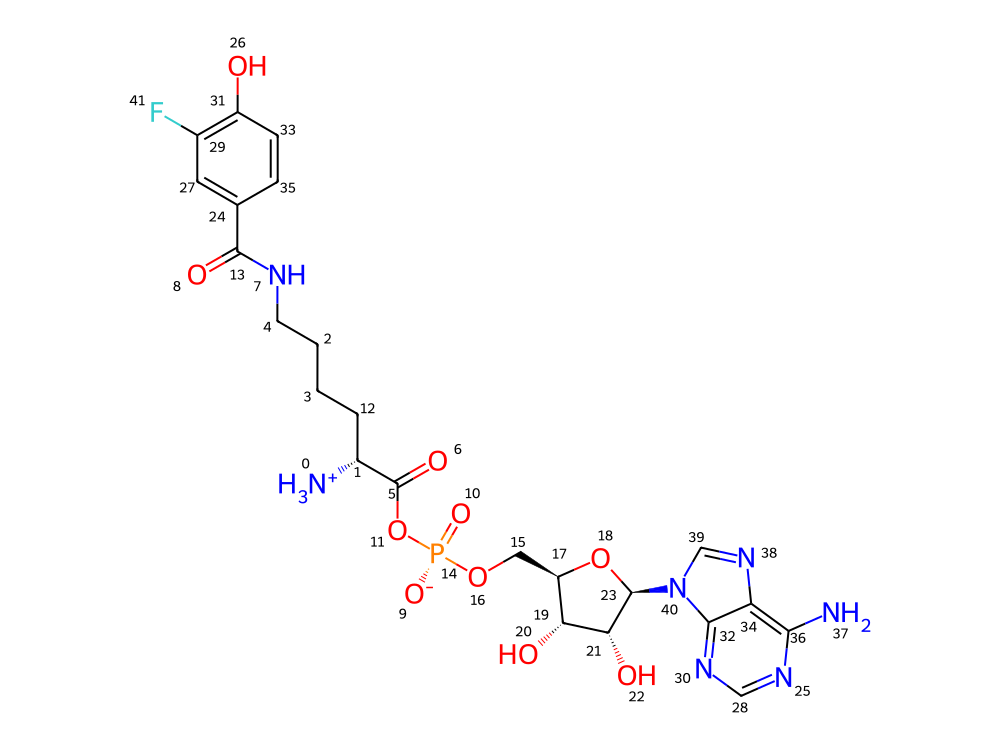

In [ ]:
#@title **1. Ligand.pdbqt Ï§ÄÎπÑ**
#@markdown ÏàòÏÜåÍ∞Ä ÏóÜÎäî ligand MOL ÌååÏùºÏùò Ïù¥Î¶ÑÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.

#@markdown Íµ¨Ï°∞Î•º ÌôïÏù∏ÌïòÍ≥† Ï†ÑÌïòÎÇò Í≤∞Ìï©Ï∞®ÏàòÍ∞Ä ÎßûÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.

#@markdown Í∑∏Î¶ºÏóê ÎÇòÏò® ÏõêÏûêÎ≤àÌò∏Îäî 0Î∂ÄÌÑ∞ ÏÖâÎãàÎã§.

ligandFile = "FhbK.mol" #@param {type:"string"}

IPythonConsole.molSize = 1000,750
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addBondIndices = False

mol = Chem.MolFromMolFile(ligandFile)
Chem.SanitizeMol(mol)
Chem.rdCoordGen.AddCoords(mol)
mol

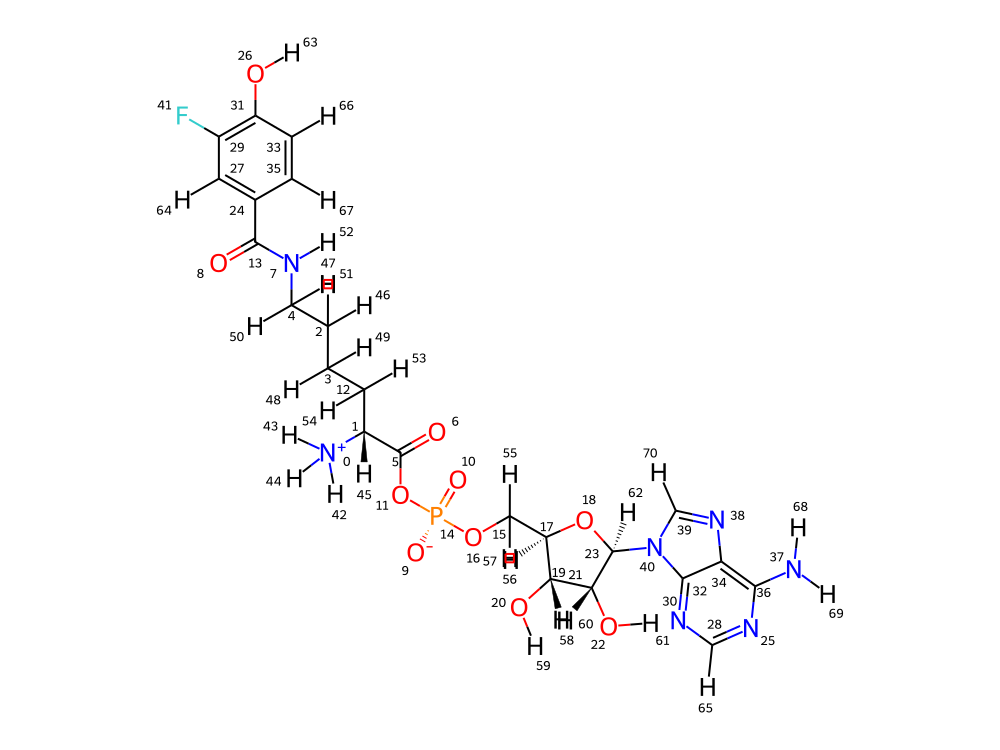

In [ ]:
# @markdown ÏàòÏÜåÎ•º ÏûêÎèôÏúºÎ°ú ÎçîÌï©ÎãàÎã§.
mol_wH = Chem.rdmolops.AddHs(mol, explicitOnly=False, addCoords=True)
mol_wH

Number of rotatable bonds : 17
Number of amide bonds : 1


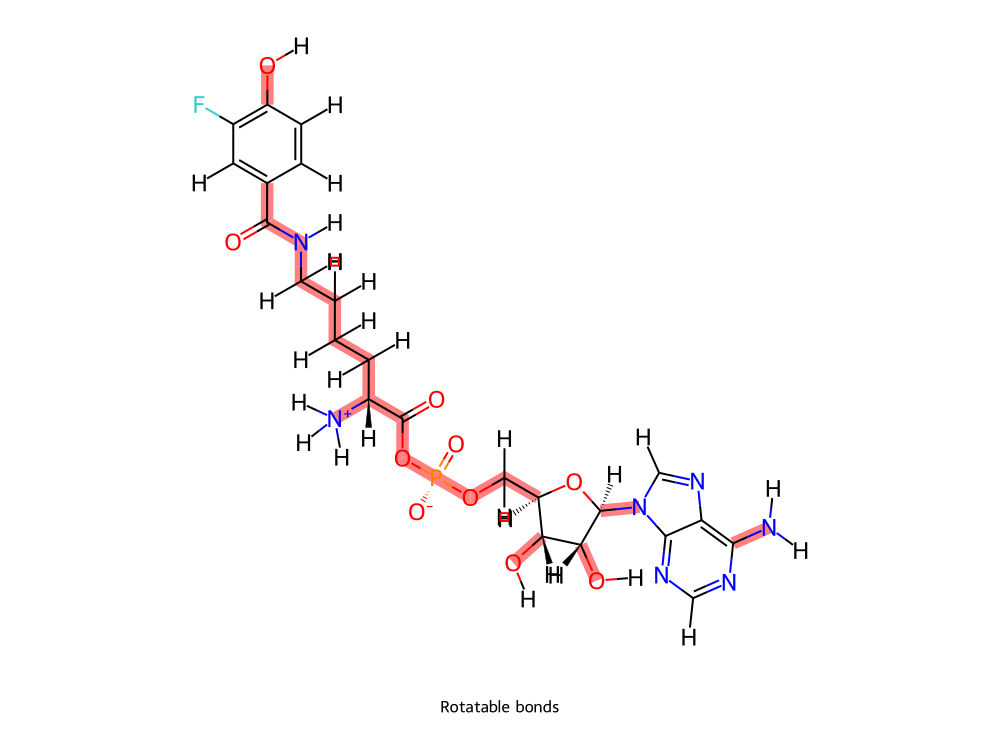

In [ ]:
#@markdown ÌöåÏ†Ñ Í∞ÄÎä•Ìïú Í≥µÏú†Í≤∞Ìï©ÏùÑ Î∂âÏùÄÏÉâÏúºÎ°ú ÌëúÏãúÌï¥Ï§çÎãàÎã§.

d = Chem.Draw.rdMolDraw2D.MolDraw2DCairo(1000, 750)

n_rot_bonds = Chem.rdMolDescriptors.CalcNumRotatableBonds(mol_wH)
n_amide_bonds = Chem.rdMolDescriptors.CalcNumAmideBonds(mol_wH)
print("Number of rotatable bonds : "+str(n_rot_bonds))
print("Number of amide bonds : "+str(n_amide_bonds))

rot_atom_pairs = mol_wH.GetSubstructMatches(RotatableBondSmarts)
rot_bonds = list(set([mol_wH.GetBondBetweenAtoms(*ap).GetIdx() for ap in rot_atom_pairs]))

Chem.Draw.rdMolDraw2D.PrepareAndDrawMolecule(d, mol_wH, legend='Rotatable bonds', highlightBonds=rot_bonds)
d.WriteDrawingText("rotatable_bond_highlight.png")
Image("rotatable_bond_highlight.png")

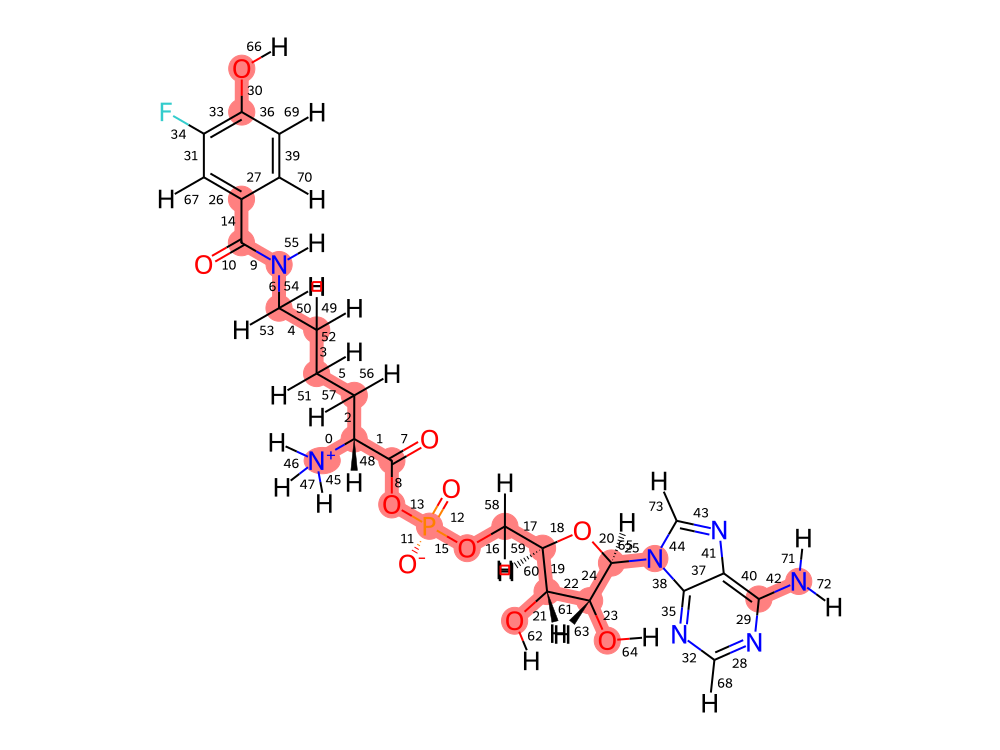

In [ ]:
# @markdown Ïù¥Ï†ú ÏõêÏûêÍ∞Ä ÏïÑÎãå Í≤∞Ìï©Ïóê Î≤àÌò∏Î•º Î∂ôÏó¨ ÌëúÏãúÌï¥ÎìúÎ¶ΩÎãàÎã§.

# @markdown Ïûò Î≥¥Í≥† ÌöåÏ†ÑÏùÑ Í≥†Ï†ïÌïòÍ≥† Ïã∂ÏùÄ Í≤∞Ìï© Î≤àÌò∏Î•º 0 1 2 Ïù¥Îü∞ ÏãùÏúºÎ°ú ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addBondIndices = True

fix_bonds = "9 14 42" #@param {type:"string"}
fix_bonds_idx = [int(s) for s in fix_bonds.split(' ')]
mol_wH

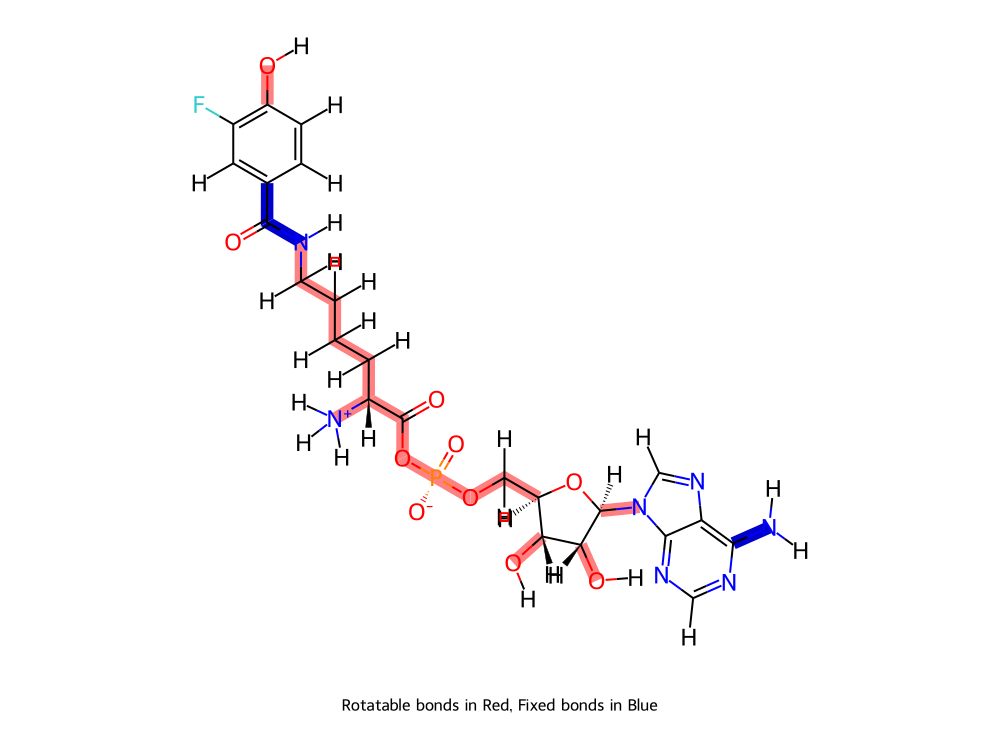

In [ ]:
# @markdown Í≥†Ï†ïÎêú Í≤∞Ìï©ÏùÄ ÌååÎûëÏÉâÏúºÎ°ú ÌëúÏãúÌïòÏòÄÏäµÎãàÎã§.

# @markdown ÏàòÏ†ïÏù¥ ÌïÑÏöîÌïòÏãúÎ©¥ Îã§Ïãú ÏúÑÏùò ÏÖÄÏùÑ Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.

bond_colors = {}

for bond in Chem.rdchem.Mol.GetBonds(mol_wH):
    if bond.GetIdx() in fix_bonds_idx:
        bond_colors[bond.GetIdx()] = (0.0,0.0,0.8)
    elif bond in rot_bonds:
        bond_colors[bond.GetIdx()] = (0.8,0.0,0.0)

d2 = Chem.Draw.rdMolDraw2D.MolDraw2DCairo(1000, 750)

Chem.Draw.rdMolDraw2D.PrepareAndDrawMolecule(d2, mol_wH, legend='Rotatable bonds in Red, Fixed bonds in Blue',
                                            highlightBonds=rot_bonds, highlightBondColors=bond_colors)

d2.WriteDrawingText("fixed_bond_highlight.png")
Image("fixed_bond_highlight.png")

In [ ]:
# @markdown Î¶¨Í∞ÑÎìú 3Ï∞®Ïõê Íµ¨Ï°∞Î•º ÏµúÏ†ÅÌôîÌï† ForceFieldÎ•º ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî.

FFtype = "UFF" #@param ['MMFF','UFF']

# @markdown ÏµúÏ†ÅÌôîÎêú Íµ¨Ï°∞Îäî ligand.sdfÏóê Ï†ÄÏû•Îê©ÎãàÎã§.

Chem.AllChem.EmbedMolecule(mol_wH)

if FFtype == 'UFF':
    Chem.AllChem.UFFOptimizeMolecule(mol_wH, maxIters=200)
else:
    Chem.AllChem.MMFFOptimizeMolecule(mol_wH, maxIters=200)
mblock = Chem.MolToMolBlock(mol_wH)
writer = Chem.SDWriter('ligand.sdf')
writer.write(mol_wH, confId=0)


view = nv.NGLWidget()
view.add_structure(nv.RdkitStructure(mol_wH))
view._set_size('1000px','750px')
view

NGLWidget()

In [ ]:
# @markdown prepare_ligand.pyÎ°ú ligand.pdbqt ÌååÏùºÏùÑ Ï§ÄÎπÑÌï©ÎãàÎã§.

SMILES = Chem.rdmolfiles.MolToSmiles(mol_wH)
rotatable = ""

for i in fix_bonds_idx:
    bond = mol_wH.GetBondWithIdx(i)
    a1 = bond.GetBeginAtom().GetIdx()+1
    a2 = bond.GetEndAtom().GetIdx()+1
    rotatable = rotatable + ' -r "'+SMILES+'" -b '+str(a1)+" "+str(a2)

if os.system('mk_prepare_ligand.py -i ligand.sdf -o ligand.pdbqt'+rotatable) == 0:
    print("ligand.pdbqt successfully generated.")

ligand.pdbqt successfully generated.


In [ ]:
# @title **2. Receptor.pdbqt Ï§ÄÎπÑ**
# @markdown Receptor PDB ÌååÏùºÎ™ÖÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî.

receptorFile = "MaPylRS.pdb" # @param {type:"string"}

view2 = nv.NGLWidget()
view2._set_size('1000px','750px')
view2.add_structure(nv.FileStructure(receptorFile))
view2


NGLWidget()

In [ ]:
# @markdown ÏàòÏÜåÎ•º ÎçîÌï¥Ï§Ñ Í∏∞Ï§Ä pHÎ•º ÏÑ§Ï†ïÌïòÏÑ∏Ïöî.
pH = 7.0 #@param {type:"slider", min:0.0, max:14.0, step:0.1}
# @markdown Í≥†Ï≥êÏßÑ PDB ÌååÏùºÏùÄ receptor-final.pdbÎ°ú Ï†ÄÏû•Îê©ÎãàÎã§.

fixer = PDBFixer(filename=receptorFile)
fixer.findMissingResidues()
fixer.findNonstandardResidues()
fixer.replaceNonstandardResidues()
fixer.removeHeterogens(True)
fixer.findMissingAtoms()
fixer.addMissingAtoms()
fixer.addMissingHydrogens(pH)

forcefield = ForceField("amber14-all.xml")
system = forcefield.createSystem(fixer.topology, CutoffNonPeriodic, 1.0*nanometers, HBonds, None, True)
integrator = LangevinMiddleIntegrator(300,1,1)
simulation = Simulation(fixer.topology, system, integrator)
simulation.context.setPositions(fixer.positions)
simulation.minimizeEnergy()

with open('receptor-fixed.pdb', 'w') as f:
    positions = simulation.context.getState(getPositions=True).getPositions()
    PDBFile.writeFile(fixer.topology, positions, f)

os.system('pdb4amber -i receptor-fixed.pdb -o receptorwithH.pdb -p --most-populous')

warnings.filterwarnings(action='ignore')

parser = PDBParser()
s = parser.get_structure('receptor', 'receptorwithH.pdb')

for chain in s.get_chains():
    for atom in chain[1].get_atoms():
        if atom.get_name() == 'H':
            setattr(atom, "id", 'H1')
            setattr(atom, "name", 'H1')
            setattr(atom, "fullname", ' H1  ')
            print(atom.id)

com = s.center_of_mass()
s.transform(np.array([[1,0,0],[0,1,0],[0,0,1]]), tran=-1*com)


io = PDBIO()
io.set_structure(s)
io.save("receptor-final.pdb")

view3 = nv.NGLWidget()
view3._set_size('1000px','750px')
view3.add_structure(nv.FileStructure("receptor-final.pdb"))
view3.add_surface(lowResolution= True, smooth=1,opacity=0.4)

view3

H1


NGLWidget()

In [ ]:
# @markdown Grid Box center Ï¢åÌëú (in Angstrom)Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî.

# @markdown ÌòπÏùÄ ÏúÑ ÏúÑÏ†ØÏóêÏÑú ÏõêÏûêÎ•º ÌÅ¥Î¶≠ÌïòÏãúÍ≥† ÏïÑÎûò Ï¢åÌëú ÏûÖÎ†•Ïπ∏ÏùÑ ÎπÑÏõåÎëêÏÑ∏Ïöî.

center_x = "-5" #@param {type:"string"}
center_y = "-10" #@param {type:"string"}
center_z = "9" #@param {type:"string"}

if center_x == "" or center_y == "" or center_z == "":
    if view3.picked == {}:
        raise ValueError("Ï¢åÌëúÍ∞Ä ÏûÖÎ†•ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
    else:
        center_x = view3.picked["atom1"]["x"]
        center_y = view3.picked["atom1"]["y"]
        center_z = view3.picked["atom1"]["z"]
else:
    center_x = float(center_x)
    center_y = float(center_y)
    center_z = float(center_z)

print(f"Box Center is {center_x:.3f}, {center_y:.3f}, {center_z:.3f}")


Box Center is -5.000, -10.000, 9.000


In [ ]:
# @markdown Grid BoxÏùò Í∏∏Ïù¥, Ìè≠, ÎÜíÏù¥Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî.
len_x = "30" #@param {type:"string"}
len_y = "45" #@param {type:"string"}
len_z = "35" #@param {type:"string"}

# @markdown Ïù¥ ÏÖÄÏùÑ Ïã§Ìñâ ÌõÑ ÏïÑÎûò ÏúÑÏ†ØÏóêÏÑú Î∞ïÏä§ ÌÅ¨Í∏∞ÏôÄ ÏúÑÏπòÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.

# @markdown center Ï¢åÌëúÎÇò box ÌÅ¨Í∏∞Î•º Î∞îÍæº ÌõÑ Ïù¥ ÏÖÄÏùÑ Îã§Ïãú Ïã§ÌñâÌï¥ ÌôïÏù∏ÌïòÏÑ∏Ïöî.

# @markdown Îπ®Í∞ïÏù¥ xÏ∂ï, Ï¥àÎ°ùÏù¥ yÏ∂ï, ÌååÎûëÏù¥ zÏ∂ïÏûÖÎãàÎã§.
show_sidechain = False # @param {type:"boolean"}

len_x = float(len_x)
len_y = float(len_y)
len_z = float(len_z)

corner1 = [center_x+len_x/2, center_y+len_y/2, center_z+len_z/2]
corner2 = [center_x-len_x/2, center_y+len_y/2, center_z+len_z/2]
corner3 = [center_x-len_x/2, center_y-len_y/2, center_z+len_z/2]
corner4 = [center_x+len_x/2, center_y-len_y/2, center_z+len_z/2]
corner5 = [center_x+len_x/2, center_y+len_y/2, center_z-len_z/2]
corner6 = [center_x-len_x/2, center_y+len_y/2, center_z-len_z/2]
corner7 = [center_x-len_x/2, center_y-len_y/2, center_z-len_z/2]
corner8 = [center_x+len_x/2, center_y-len_y/2, center_z-len_z/2]

view3 = nv.NGLWidget()
view3._set_size('1000px','750px')
view3.add_structure(nv.FileStructure("receptor-final.pdb"))
view3.add_surface(lowResolution= True, smooth=1,opacity=0.4)

view3.shape.add_cylinder(corner1, corner2, [1,1,1], [0.1])
view3.shape.add_cylinder(corner2, corner3, [1,1,1], [0.1])
view3.shape.add_cylinder(corner3, corner4, [1,1,1], [0.1])
view3.shape.add_cylinder(corner4, corner1, [1,1,1], [0.1])
view3.shape.add_cylinder(corner1, corner5, [1,1,1], [0.1])
view3.shape.add_cylinder(corner2, corner6, [1,1,1], [0.1])
view3.shape.add_cylinder(corner3, corner7, [0,0,1], [0.2])
view3.shape.add_cylinder(corner4, corner8, [1,1,1], [0.1])
view3.shape.add_cylinder(corner5, corner6, [1,1,1], [0.1])
view3.shape.add_cylinder(corner6, corner7, [0,1,0], [0.2])
view3.shape.add_cylinder(corner7, corner8, [1,0,0], [0.2])
view3.shape.add_cylinder(corner8, corner5, [1,1,1], [0.1])

if show_sidechain:
    view3.add_licorice("sidechain")
view3

NGLWidget()

In [ ]:
# @markdown ÏßÄÏ†ïÌïòÍ≥† Ïã∂ÏùÄ Flexible residueÎì§ÏùÑ ÏâºÌëúÎ°ú Íµ¨Î∂ÑÌïòÏó¨ ÏûÖÎ†•ÌïòÏÑ∏Ïöî.

# @markdown "Chain ID : Residue name : Residue number" ÏãùÏúºÎ°ú Í≥µÎ∞±ÏóÜÏù¥ Ïç®Ï£ºÏÑ∏Ïöî.
flexible_residues = "A:GLU:218,A:SER:221,A:ARG:248" # @param {type:"string"}

# @markdown ÏßÄÏ†ïÎêú flexible residueÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.

fr = flexible_residues.split(',')

flex_res = ""
selection = ""

if fr != [""]:
    flexFlag = True
else:
    flexFlag = False

if flexFlag:
    for i, res in enumerate(fr):
        flex_res = flex_res + " -f "+res
        resinfo = res.split(':')
        selection = selection + "(:"+resinfo[0]+" and "+resinfo[2]+")"
        if i != (len(fr)-1):
            selection = selection + " or "

view3 = nv.NGLWidget()
view3._set_size('1000px','750px')
view3.add_structure(nv.FileStructure("receptor-final.pdb"))
view3.add_surface(lowResolution= True, smooth=1,opacity=0.4)
view3.shape.add_cylinder(corner1, corner2, [1,1,1], [0.1])
view3.shape.add_cylinder(corner2, corner3, [1,1,1], [0.1])
view3.shape.add_cylinder(corner3, corner4, [1,1,1], [0.1])
view3.shape.add_cylinder(corner4, corner1, [1,1,1], [0.1])
view3.shape.add_cylinder(corner1, corner5, [1,1,1], [0.1])
view3.shape.add_cylinder(corner2, corner6, [1,1,1], [0.1])
view3.shape.add_cylinder(corner3, corner7, [0,0,1], [0.2])
view3.shape.add_cylinder(corner4, corner8, [1,1,1], [0.1])
view3.shape.add_cylinder(corner5, corner6, [1,1,1], [0.1])
view3.shape.add_cylinder(corner6, corner7, [0,1,0], [0.2])
view3.shape.add_cylinder(corner7, corner8, [1,0,0], [0.2])
view3.shape.add_cylinder(corner8, corner5, [1,1,1], [0.1])

if flexFlag:
    view3.add_licorice(selection=selection, color='red')
    view3.add_surface(selection=selection, color='red',
                      lowresolution=False, smooth=1,opacity=0.8)

view3

NGLWidget()

In [ ]:
# @markdown prepare_receptor.pyÎ°ú receptor.pdbqtÎ•º Ï§ÄÎπÑÌï©ÎãàÎã§.

if os.system('mk_prepare_receptor.py --pdb receptor-final.pdb -o receptor.pdbqt --box_size '+str(len_x)+' '+str(len_y)+' '+str(len_z)+' --box_center '+str(center_x)+' '+str(center_y)+' '+str(center_z)+flex_res) == 0:
    print('receptor.pdbqt successfully generated.')

receptor.pdbqt successfully generated.


In [ ]:
locale.getpreferredencoding = lambda: "UTF-8"

# @title **3. QuickVina2Î•º Ïù¥Ïö©Ìïú ÎèÑÌÇπ**
output = "ligand_out.pdbqt"
# @markdown Exhaustiveness Í∞íÏùÑ ÏÑ§Ï†ïÌïòÏÑ∏Ïöî. ÌÅ¥ ÏàòÎ°ù Ïò§Îûò Í±∏Î¶ΩÎãàÎã§.
exhaustiveness = 32 #@param {type:"slider", min:8, max:512, step:8}
# @markdown ÎèÑÌÇπ Î°úÍ∑∏Îäî docking_log.txtÏóê, Í≤∞Í≥ºÎäî ligand_out.pdbqtÏóê Ï†ÄÏû•Îê©ÎãàÎã§.

if flexFlag:
    rigid = "receptor = receptor_rigid.pdbqt\n"
    flex_rec = "flex = receptor_flex.pdbqt\n"
else:
    rigid = "receptor.pdbqt\n"
    flex_rec = ""

with open('config', 'w') as f:
    f.write(rigid)
    f.write("ligand = ligand.pdbqt\n")
    f.write("center_x = "+str(center_x)+'\n')
    f.write("center_y = "+str(center_x)+'\n')
    f.write("center_z = "+str(center_x)+'\n')
    f.write("size_x = "+str(len_x)+'\n')
    f.write("size_y = "+str(len_y)+'\n')
    f.write("size_z = "+str(len_z)+'\n')
    f.write("out = "+output+'\n')
    f.write("log = docking_log.txt\n")
    f.write("exhaustiveness = "+str(exhaustiveness)+'\n')
    f.write(flex_rec)

!/content/qvina/bin/qvina2.1 --config config

############################################################################
# If you used Quick Vina 2 in your work, please cite:                      #
#                                                                          #
# Amr Alhossary, Stephanus Daniel Handoko, Yuguang Mu, and Chee-Keong Kwoh,#
# Fast, Accurate, and Reliable Molecular Docking with QuickVina 2,         #
# Bioinformatics (2015), doi: 10.1093/bioinformatics/btv082                #
#                                                                          #
# You are also encouraged to cite Quick Vina 1:                            #
# Stephanus Daniel Handoko, Xuchang Ouyang, Chinh Tran To Su, Chee Keong   #
# Kwoh, Yew Soon Ong,                                                      #
# QuickVina: Accelerating AutoDock Vina Using Gradient-Based Heuristics for#
# Global Optimization,                                                     #
# IEEE/ACM Transactions on Computational Biology and Bioinformatics,vol.9, #

In [ ]:
# @title **4. Í≤∞Í≥º Î∂ÑÏÑù**
# @markdown ligand_out.pdbqt ÌååÏùºÏùÑ ÏùΩÏñ¥Îì§ÏûÖÎãàÎã§.

pdb = PDBFile('receptor-final.pdb')
modeller = Modeller(pdb.topology, pdb.positions)

Hstodelete = []

for bond in modeller.topology.bonds():
    A = bond[0]
    B = bond[1]

    if A.element == element.hydrogen and B.element == element.carbon:
        Hstodelete.append(A)
    elif A.element == element.carbon and B.element == element.hydrogen:
        Hstodelete.append(B)

Hstodelete = list(set(Hstodelete))

modeller.delete(Hstodelete)

def typeConverter(universe):

    type2element = {'H':'H','C':'C','A':'C','N':'N','P':'P','S':'S','Br':'Br','BR':'Br','I':'I','F':'F','Cl':'Cl','CL':'Cl',
                    'NA':'N','OA':'O','SA':'S','OS':'O','NS':'N','HD':'H','HS':'H','Mg':'Mg','Ca':'Ca','Fe':'Fe','Zn':'Zn',
                    'Mn': 'Mn','MG':'Mg','CA':'Ca','FE':'Fe','ZN':'Zn','MN':'Mn','G':'C','J':'C','Q':'C','GA':'C'}

    elements = []
    for i in range(len(universe.atoms)):
        elements.append(type2element[universe.atoms.types[i]])
    #universe.add_TopologyAttr('types', elements)
    universe.add_TopologyAttr('elements', elements)

    return universe


ligs = typeConverter(mda.Universe("ligand_out.pdbqt"))

size = len(ligs.atoms)/9


l = []
for i in range(9):
    b_i = int(i*size)
    e_i = int((i+1)*size-1)
    l.append(ligs.select_atoms("index "+str(b_i)+':'+str(e_i), sorted=False).convert_to("PARMED"))

In [ ]:
# @markdown Î≥¥Í≥† Ïã∂ÏùÄ poseÎ•º ÏÑ†ÌÉùÌïòÏÑ∏Ïöî.
flexFlag=True
if flexFlag:
    r = typeConverter(mda.Universe("receptor_rigid.pdbqt")).atoms.convert_to("PARMED")
else:
    r = parmed.read_PDB("receptor-final.pdb")

pose = "1" # @param [1,2,3,4,5,6,7,8,9]

c = r+l[int(pose)-1]

view4 = nv.NGLWidget()
view4._set_size('1000px', '750px')
view4.add_structure(nv.ParmEdTrajectory(c), defaultRepresentation=False)
view4.add_cartoon(selection="protein")
view4.add_surface(selection="protein", smooth=1, opacity=0.5)
view4.add_ball_and_stick(selection="not protein", aspectRatio=2.5)
view4

NGLWidget()

In [ ]:
# @markdown ÏúÑÏóêÏÑú Ï†ïÌïú docked poseÎ•º ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.

u = mda.Universe(c)

flex_res = []

if flexFlag:
    fr = flexible_residues.split(',')
    for res in fr:
        res_info = res.split(':')
        flex_res.append(u.select_atoms("protein and resname "+res_info[1]+" and resnum "+res_info[2]))

for i in range(len(flex_res)):
    res = u.atoms.split('residue')[-i-1]
    a = res.select_atoms("name CA")
    dists = []
    for res2 in flex_res:
        resids_A, resids_B, dist = distances.dist(a,res2.select_atoms("name C"))
        dists.append(list(dist)[0])

    nearest = flex_res[dists.index(min(dists))][0]
    res.residues.resnames = nearest.resname
    res.residues.resnums = nearest.resnum

lig_w_pose = u.select_atoms("not protein").convert_to("RDKIT")
lmol = Chem.rdmolops.AddHs(lig_w_pose, explicitOnly=False, addCoords=True, addResidueInfo=True)

prot = u.select_atoms("protein").convert_to("PARMED")
modeller2 = Modeller(modeller.topology, prot.positions)

modeller2.addHydrogens(forcefield, pH)
system = forcefield.createSystem(modeller2.topology, CutoffNonPeriodic, 1.0*nanometers, None, True, True)
prot_parmed = parmed.openmm.load_topology(modeller2.topology, system, modeller2.positions)
u = mda.Universe(prot_parmed + parmed.load_rdkit(lmol))
lig = u.select_atoms("not protein")
prot = u.select_atoms("protein")

pdb = mda.coordinates.PDB.PDBWriter(filename="docked_pose_"+str(pose)+".pdb", bonds="all", n_atoms=u.atoms.n_atoms)
pdb.write_all_timesteps(u)